<a href="https://colab.research.google.com/github/Dan22dongwon/DeeplearningQuest/blob/main/2_%EB%8B%A4%EC%B8%B5_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0(Multi_Layer_Perceptron)_%EA%B5%AC%EC%A1%B0_%EB%B3%B5%EC%8A%B5%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

안녕하세요!

다층 퍼셉트론 구조를 복습해 보기 위해 오신 여러분들 반갑습니다~ 🤗

오늘은 딥러닝의 기초가 되는 MLP 모델을 복습하고, 그 MLP 모델이 가지고 있는 한계점이 어떤 것이 있는지 알아보는 시간을 가져봅시다. 노드를 학습하기 전, 뇌를 말랑하게 하는 시간으로 아이스브레이킹 질문을 보고 답변을 해볼까요?



### 학습 내용
#### 2-2. MLP 모델 복습하기
MLP 모델 발전까지의 역사를 간단하게 살펴보고 MLP 모델의 효과에 대해서 알아봅시다. 또한, MNIST 데이터를 활용하여 MLP 모델로 이미지를 분류해 봅시다.
#### 2-3. MLP 모델의 한계
MLP 모델의 한계를 코드로 알아보고 이미지 데이터가 MLP 모델의 구조와 왜 불합치 한지를 알아봅시다.


### 학습 목표
- Multi-Layer Perceptron(MLP) 구조를 설명할 수 있습니다.
- MLP를 이용해서 이미지 분류를 어떻게 할 수 있는지를 설명하고, 코드를 작성할 수 있습니다.
- 이미지 데이터를 분석할 때 MLP가 가진 한계점을 설명할 수 있습니다.


Q. 딥러닝(Deep Learning) 구조의 핵심은 무엇인가요?

딥러닝 구조의 핵심은 여러 개의 hidden layer로 인해 학습기(learner)가 deep 하다는 것입니다.

Q. 뉴런의 작동 방식은 크게 세 부분으로 나눠서 볼 수 있습니다. 뉴런이 어떻게 동작하는지 세 부분으로 나눠서 설명해 보세요.

수용 → 조합 → 경계값/조건에 따라 전달

맞아요. 뉴런은 계속해서 신호를 받아서 조합(sum) 하고, 특정 threshold(경계값)를 넘어서면 “fire(발산, 전달)” 합니다.


### 퍼셉트론의 구조
- 퍼셉트론 ≈ 뉴론
- 입력변수 ≈ 수용
- 가중합 ≈ 조합
- 활성함수 ≈ Threshold
- 최종 결과물 ≈ 전달

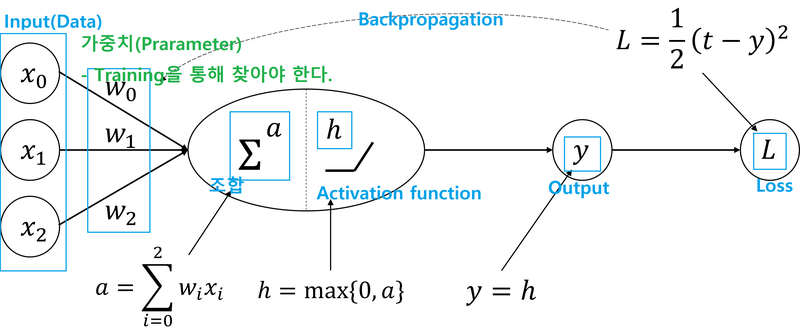

Q. 퍼셉트론은 단일 뉴런의 작동 원리를 모사한 것입니다. 뉴런과 퍼셉트론을 비교해서 설명해 보세요.

뉴론은 시냅스로부터 탐지된 자극을 수상돌기를 통해 세포핵에 전달 후 역치를 넘어서는 자극에 대해서는 축색돌기를 이용하여 다른 뉴런으로 정보를 전달합니다. 퍼셉트론은 입력변수의 값들에 대한 가중합에 대해 활성함수를 적용하여 최종 결과물을 생성합니다.

뉴론과 퍼셉트론에 나오는 개념들을 매치를 시켜서 본다면 작동 원리가 매우 유사하다는 것을 알 수 있습니다.

Q. MLP 모델 구조를 보면 여러 개의 hidden layer로 이뤄져 있는 것을 알 수 있습니다. 이것들은 Representation learning을 수행한다고 말할 수 있습니다. 이때 Representation learning은 무엇을 의미하고, 또 다른 말로 어떻게 부를 수 있는지 설명해 보세요.

Representation learning은 Representation을 통해서 원래 데이터가 존재하는 공간을 변경하는 것을 의미합니다. 정리해서 설명하자면, Representation learning은 Training 하는 과정에서 parameter를 계속해서 변형하여 task를 수행하는 데에 가장 적합한 공간구조를 Representation을 합니다.

Representation learning은 Pattern Extractor(패턴 추출기) Feature Extractor라고 부릅니다. 이는 MLP 모델이 가진 큰 장점이라고 말할 수 있으며, 어떻게 하면 Feature Extractor를 잘 만들 수 있을까가 딥러닝 모델을 만들 때 핵심이 됩니다.

### MLP 모델로 이미지 분류해보기
#### MNIST 데이터 살펴보기
먼저 필요한 라이브러리를 import하고 ```tf.keras.datasets.mnist.load_data()``` 함수를 이용해 MNIST 데이터셋을 불러옵니다.

In [1]:
import sys
import tensorflow as tf
import numpy as np

In [2]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


MNIST 데이터가 어떻게 생겼는지 확인해볼까요?

5


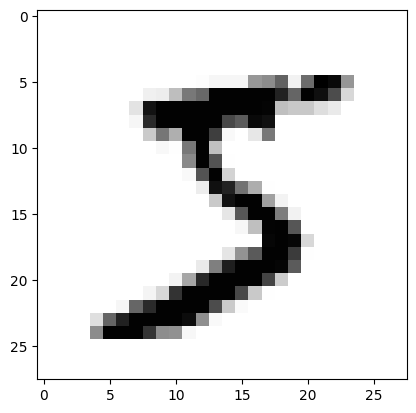

In [3]:
# MNIST 데이터를 시각화하기
import matplotlib.pyplot as plt
print(Y_train[0])
plt.imshow(X_train[0], cmap='Greys') # 흑백 이미지로 확인
plt.show()

MNIST 데이터는 위와 같이 이미지처럼 나타낼 수 있지만 사실은 2차원 배열에 픽셀 값이 저장되어 있는 형태입니다. 즉 0과 255 사이의 정수로 구성된 데이터입니다.

In [4]:
# 데이터를 직접 들여다보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


### MLP 구조 만들기
MLP(Multi Layer Perceptron)의 입력 데이터는 기본적으로 벡터 형태입니다.
X_train은 28 x 28 크기의 MNIST 데이터 60,000개가 모여 있는 배열이기 때문에, 각각의 데이터를 (28, 28) 크기의 행렬(2차원)에서 길이가 28x28=784인 벡터(1차원)로 변형시켜야 합니다. X_test에 포함된 데이터도 reshape() 함수를 사용하여 크기를 바꿔줍시다.

In [5]:
# MLP 구조에 적절한 input의 형태로 변형하기
## reshape()을 사용하여 2차원의 데이터를 1차원으로 변형
## 1차원으로 변형함과 동시에 Normalization
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') # 28 x 28= 784
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

데이터셋 행렬의 크기를 다시 확인해봅시다.
X_train의 경우 (60000, 28, 28)에서 (60000, 784)로 변형된 것을 확인할 수 있습니다.

In [7]:
# Q. reshape한 X_train과 X_test의 shape을 다시 확인해 보세요.
# [[YOUR CODE]]

print(X_train.shape)  # Updated shape of X_train
print(X_test.shape)   # Updated shape of X_test

(60000, 784)
(10000, 784)


label의 경우 현재 0~9의 정수 값을 가지고 있습니다.
이 값들을 분류 문제에 맞게 one-hot vector로 만들어줍시다. Y_train, Y_test의 shape을 다시 보면 길이가 10인 벡터 60,000개(test는 10,000개)가 묶인 형태로 바뀐 것을 확인할 수 있습니다.

> 원-핫 인코딩은 "단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식이며, 이렇게 표현된 벡터를 원-핫 벡터(One-Hot vector)"라고 합니다. (출처: 위키독스)

In [8]:
# Label 값을 One-hot encoding 하기
# Multi-Class Classfication이므로 keras.utils.to_categorical을 사용
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [9]:
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[0])

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


본격적으로 MLP 모델을 만들어봅시다. 모델을 만드는 여러 가지 방법이 있지만 여기서는 Functional API로 만들어 봅시다.

이번에 구현할 모델은 input layer와 두 개의 hidden layer, 그리고 output layer로 구성되어 있습니다.
특히 output layer는 특별한 task를 수행하는데, 이 경우에는 10개의 class를 분류 (multi-class classification)하는 것입니다. 만약 output layer의 perceptron이 회귀 문제에서와 같이 실수 출력 값을 가진다면 수행하고자 하는 분류 task에 적절하지 않습니다. 왜냐 하면 분류 문제에서 label 값은 one-hot vector로 인코딩되고, 이것은 특정 클래스에 속할 확률이 1이라고 해석될 수 있기 때문입니다. 그러므로 10개의 perceptron에서 나온 출력을 확률 값으로 만들기 위해 활성화 함수로 softmax를 사용해야 합니다.






In [10]:
# 모델 설계하기
input_layer = tf.keras.layers.Input(shape=(784,)) # input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) # hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2

# 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


모델의 loss 함수, optimizer, metric을 설정하고 모델을 compile해줍시다.

In [11]:
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

### LP 모델 Training 하기
model.fit() 함수를 이용하여 모델 학습을 시작합니다.

In [12]:
# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())

Epoch 1/30
48/48 [==============================] - 3s 53ms/step - loss: 12.2189 - categorical_accuracy: 0.8048 - val_loss: 1.2648 - val_categorical_accuracy: 0.9261
Epoch 2/30
48/48 [==============================] - 2s 49ms/step - loss: 0.8154 - categorical_accuracy: 0.9353 - val_loss: 0.7483 - val_categorical_accuracy: 0.9352
Epoch 3/30
48/48 [==============================] - 2s 49ms/step - loss: 0.3814 - categorical_accuracy: 0.9576 - val_loss: 0.6488 - val_categorical_accuracy: 0.9401
Epoch 4/30
48/48 [==============================] - 3s 53ms/step - loss: 0.1982 - categorical_accuracy: 0.9717 - val_loss: 0.5727 - val_categorical_accuracy: 0.9452
Epoch 5/30
48/48 [==============================] - 3s 59ms/step - loss: 0.1003 - categorical_accuracy: 0.9818 - val_loss: 0.5415 - val_categorical_accuracy: 0.9473
Epoch 6/30
48/48 [==============================] - 2s 50ms/step - loss: 0.0512 - categorical_accuracy: 0.9890 - val_loss: 0.5092 - val_categorical_accuracy: 0.9498
Epoch 7/3

training loss와 validation loss를 확인해봅시다.

In [13]:
# Training loss 확인하기
loss = history.history['loss']
print(loss)

[12.21888256072998, 0.8154197335243225, 0.38142621517181396, 0.19824063777923584, 0.10030639916658401, 0.05115557834506035, 0.02433253824710846, 0.01035480760037899, 0.0038123733829706907, 0.0014742222847416997, 0.0004885104717686772, 0.00027128224610351026, 0.0002256223961012438, 0.00019847351359203458, 0.00017903737898450345, 0.0001636412343941629, 0.00015156199515331537, 0.00014086546434555203, 0.00013150680752005428, 0.0001232679351232946, 0.00011574942618608475, 0.00010932244185823947, 0.00010343806934542954, 9.797224629437551e-05, 9.316891373600811e-05, 8.839346992317587e-05, 8.423914550803602e-05, 8.052110933931544e-05, 7.692617509746924e-05, 7.368763908743858e-05]


In [14]:
# Q. Validation loss를 확인해 보세요.
# [[YOUR CODE]]
val_loss = history.history['val_loss']
print(val_loss)

[1.264825701713562, 0.7483181357383728, 0.6487565040588379, 0.572656512260437, 0.5414534211158752, 0.5091975331306458, 0.5067098140716553, 0.5027598738670349, 0.4999787211418152, 0.49376246333122253, 0.49502483010292053, 0.4944303035736084, 0.49396464228630066, 0.4935660660266876, 0.49324271082878113, 0.4931977093219757, 0.4932824373245239, 0.49313825368881226, 0.4930940270423889, 0.49311646819114685, 0.4930873513221741, 0.4930557906627655, 0.4932243227958679, 0.4931924641132355, 0.4927723705768585, 0.493165522813797, 0.4929499924182892, 0.4929170608520508, 0.49308863282203674, 0.49302372336387634]


### 학습된 모델의 성능 확인하기
model.evaluate() 함수에 test 데이터를 입력시켜서 모델의 정확도를 확인하고, 학습이 진행되면서 training loss와 test loss가 어떻게 변하는지 그래프를 그려서 확인해봅시다.

In [15]:
# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.4433 - categorical_accuracy: 0.9570

 Test Accuracy: 0.9570


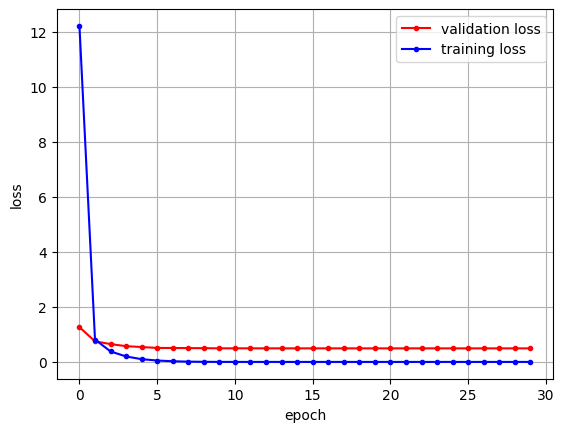

In [16]:
# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='validation loss')
plt.plot(x_len, loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Training loss과 test loss가 모두 아주 낮은 것을 확인할 수 있습니다. 따라서 학습한 모델이 매우 좋은 예측 성능을 보일 것으로 예상할 수 있습니다.

### Playground
모델을 다르게 만들면 성능이 더 좋아질까요? 직접 모델을 설계하여 성능을 높여보세요.

In [17]:
# 모델 설계
# [[YOUR CODE]]
input_layer = tf.keras.layers.Input(shape=(784,))
x = tf.keras.layers.Dense(512, activation='relu')(input_layer)
x = tf.keras.layers.Dropout(0.2)(x)  # Adding dropout layer for regularization
x = tf.keras.layers.Dense(256, activation='relu')(x)  # Adding an additional hidden layer
x = tf.keras.layers.Dropout(0.2)(x)
out_layer = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainab

In [18]:
#  loss 함수, optimizer, metric 설정 & 모델 compile
# [[YOUR CODE]]
loss = tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
metric = tf.keras.metrics.categorical_accuracy

model.compile(loss=loss, optimizer=optimizer, metrics=[metric])

In [19]:
# Training
# [[YOUR CODE]]
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)

Epoch 1/30
48/48 [==============================] - 3s 47ms/step - loss: 13.2119 - categorical_accuracy: 0.7485 - val_loss: 0.9660 - val_categorical_accuracy: 0.9139
Epoch 2/30
48/48 [==============================] - 2s 44ms/step - loss: 1.5189 - categorical_accuracy: 0.8664 - val_loss: 0.5135 - val_categorical_accuracy: 0.9241
Epoch 3/30
48/48 [==============================] - 2s 47ms/step - loss: 0.9302 - categorical_accuracy: 0.8769 - val_loss: 0.3825 - val_categorical_accuracy: 0.9286
Epoch 4/30
48/48 [==============================] - 3s 66ms/step - loss: 0.6561 - categorical_accuracy: 0.8889 - val_loss: 0.3018 - val_categorical_accuracy: 0.9311
Epoch 5/30
48/48 [==============================] - 3s 56ms/step - loss: 0.5122 - categorical_accuracy: 0.8979 - val_loss: 0.2685 - val_categorical_accuracy: 0.9379
Epoch 6/30
48/48 [==============================] - 2s 48ms/step - loss: 0.4152 - categorical_accuracy: 0.9104 - val_loss: 0.2432 - val_categorical_accuracy: 0.9423
Epoch 7/3

In [20]:
# 성능 확인
# [[YOUR CODE]]

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1543 - categorical_accuracy: 0.9694
Test Loss: 0.15433554351329803
Test Accuracy: 0.9693999886512756


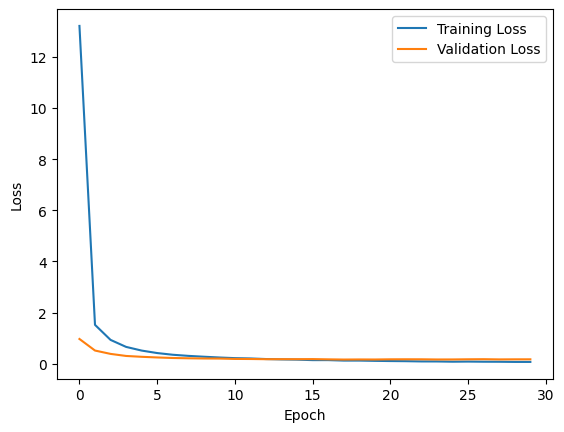

In [21]:
# 시각화
# [[YOUR CODE]]
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 2-3. MLP 모델의 한계
먼저 MLP 모델의 한계을 코드로 살펴보고, 영상을 통해 MLP 모델의 한계점을 정리할 거에요!



### 2-3. MLP 모델의 한계
먼저 MLP 모델의 한계을 코드로 살펴보고, 영상을 통해 MLP 모델의 한계점을 정리할 거에요!

### MLP 모델의 한계를 코드로 확인하기
MLP 모델의 한계를 코드로 확인해 보겠습니다. 원본 데이터를 살짝 변형했을 때 MLP 구조가 이미지를 잘 인식하는지 실펴 보겠습니다.

#### 원본 데이터를 변형해서 MLP 구조의 성능 테스트하기
이번 스텝에서 사용할 OpenCV 라이브러리와 MNIST 데이터를 불러옵시다. 참고로 OpenCV 라이브러리는 이미지 데이터를 다루는 데에 매우 효과적인 도구들을 갖추고 있는 모듈입니다.

In [22]:
# OpenCV 모듈 불러오기
import cv2

In [23]:
# Q. 다시 한번 MNIST 데이터를 불러와 보세요.
# [[YOUR CODE]]
import tensorflow as tf

# Load MNIST dataset
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# Check the shape
print(X_train.shape)  # (60000, 28, 28)
print(Y_train.shape)  # (60000,)
print(X_test.shape)   # (10000, 28, 28)
print(Y_test.shape)   # (10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


이전 스텝에서 확인했던 것처럼, 원본 MNIST 데이터는 다음과 같이 생겼습니다.

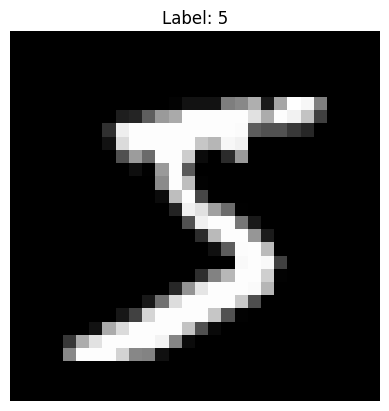

In [24]:
# Q. MNIST 데이터가 어떻게 생겼는지 확인해 봅시다. (이전 스텝을 참고해서 코드를 작성해 보세요.)
# [[YOUR CODE]]
import matplotlib.pyplot as plt

# Display the first sample
plt.imshow(X_train[0], cmap='gray')
plt.title('Label: {}'.format(Y_train[0]))
plt.axis('off')
plt.show()

이번에는 MNIST 데이터에 장난을 조금 쳐보겠습니다.
OpenCV의 함수들을 이용해서 MNIST 이미지에 회전 변환과 이동 변환(선형 변환)을 적용합니다.

선형 변환을 위해서 변환 매트릭스를 먼저 구하고, 이미지에 변환 매트릭스를 적용해 봅시다. 즉 원본 이미지에 선형 변환 매트릭스를 곱하여 원본 이미지를 변환하는 것입니다.

In [25]:
# 이미지 회전 변환 메트릭스 구하기
M= cv2.getRotationMatrix2D((20, 25), 20, 1)  ## 회전 변환 Matrix 생성

# 이미지 이동 변환 메트릭스 구하기
M[0, 2] = M[0, 2] + 3
M[1, 2] = M[1, 2] + 3

# 이미지 변환 메트릭스 적용
test_image = cv2.warpAffine(X_train[5], M, (28, 28))  ## image에 matrix 곱

변환된 이미지는 다음과 같습니다.

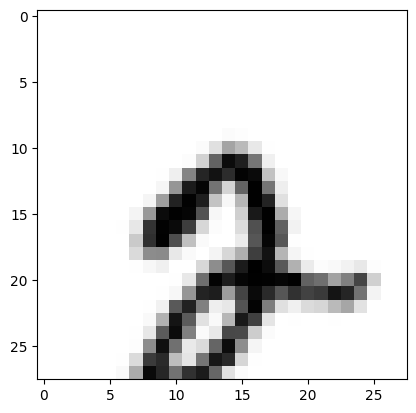

In [26]:
plt.imshow(test_image, cmap='Greys')

MLP 모델은 변환된 이미지도 분류를 잘 할 수 있을까요?
이전 스텝에서와 같이 이미지의 shape을 바꿔주고 모델에 넣어줍니다.

In [27]:
# MLP의 input 데이터를 넣어주기 위해 1x784 형태로 reshape하고 normalization
test_image_reshape = test_image.reshape(1, 784).astype('float64')

In [28]:
Y_prediction = model.predict(test_image_reshape)

1/1 [==============================] - 0s 60ms/step


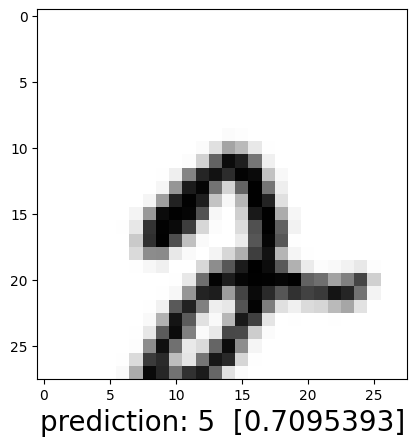

In [29]:
index = np.argmax(Y_prediction) # 10개의 class가 각 확률 값으로 나오기 때문에 가장 높은 값을 가진 인덱스를 추출
value = Y_prediction[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel("prediction: "+str(index)+"  " +str(value), fontsize=20)
plt.show()

분명히 숫자 2를 나타낸 이미지였지만 간단한 변환을 적용했더니 모델은 데이터를 다른 숫자로 잘못 인식했습니다. 즉 MLP로 학습한 모델은 이미지 분류기로서는 robust classifier가 아니라는 것을 알 수 있습니다. MLP를 이용해서 이미지를 분류하는 데에는 뭔가 문제가 있는 것 같습니다.

분명히 이전에 학습한 결과는 test loss가 매우 낮았으므로 분류 성능이 좋아야 하는데, 왜 이런 결과를 보이는 걸까요?

Q. MNIST dataset을 가지고 MLP 모델에 적용해 보았습니다. MLP 모델에 데이터 셋을 적용하려면 data 구조를 어떻게 변경해야 하는지 설명해 보세요.


MNIST dataset은 28 x 28 사이즈로 784 pixel의 2D 이미지입니다. 이를 MLP 모델에 적용하기 위해서는 2차원 데이터 1차원 구조로 변경시켜야 합니다.

2D(Dimension)를 1D(Dimension)로 변경하는 법은 각각의 열의 값을 1차원의 값(28개의 노드)으로 만들어 줍니다. 1열부터 28열까지 동일한 과정을 진행하면 784개의 값이 MLP에 들어가게 됩니다.


Q. 2차원의 이미지(고양이)를 1차원의 구조로 바꾸면 고양이라고 할 수 있을까요? 🐈❓

하나의 픽셀의 의미는 주변 픽셀과의 관계를 통해서 결정되기 때문에 2차원 이미지를 1차원의 구조로 바꾸면 숨겨져 있던 패턴의 정보가 사라집니다. 따라서 1차원의 구조로 바꾼 것만을 보고는 고양이라고 이야기를 하기는 어렵게 됩니다. 🐈🚫


Q. 하나의 픽셀은 하나의 픽셀만을 가지고 정보와 의미를 파악할 수 있을까요?

앞에 배운 것처럼 하나의 픽셀만을 가지고 정보와 의미를 파악할 수 없습니다. 픽셀의 정보와 의미를 파악하기 위해서는 주변(상하좌우) 픽셀과의 관계에 의해서 결정됩니다.


###  종합 퀴즈
재밌게 학습하셨나요?

지금까지 여러분들이 얼마나 학습을 충실히 하셨는지 알아보려고 합니다. 여러분의 실력을 쑥쑥 향상시켜줄 수 있는 퀴즈이기도 하므로 배운 내용을 다시 생각하면서 아래의 퀴즈를 빠짐없이 풀어보세요. 🤗


Q. MLP 모델 구조의 핵심을 한 줄로 요약해 봅시다.

MLP 모델 구조의 핵심은 데이터 안에 숨겨진 패턴을 Representation을 통해서 찾는 것입니다.


Q. MLP 모델로 이미지 분류를 하기 위해서는 2차원의 이미지를 1차원으로 변형해야 했습니다. 이때, 발생하는 문제점은 어떤 것인지 설명해 봅시다.

이미지 차원을 변형하면, 이미지 데이터가 가진 정보를 잃게 됩니다. (아까 고양이 사진 기억나시죠? 😉)

종합 퀴즈의 난도는 어떠셨나요?

학습을 충실히 하셨다면 쉽게 해결하셨을 것이라 생각합니다. 혹시라도 답을 맞추지 못하셨다면 다시 한번 배웠던 내용을 복습해 보세요.

지금까지 수고 많이 하셨습니다! 🤠